conjunto de datos MNIST (Modified National Institute of Standards and Technology) es un conjunto de imágenes que contiene dígitos escritos a mano, ampliamente utilizado como punto de referencia en el campo de la visión por computadora y el aprendizaje automático. Fue creado a partir de dos conjuntos de datos más grandes recopilados por el Instituto Nacional de Estándares y Tecnología de EE. UU.

#### Cargar Conjunto de Datos MNIST

In [1]:
import keras
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images,test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


#### Visualización de una muestra

label: 0
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

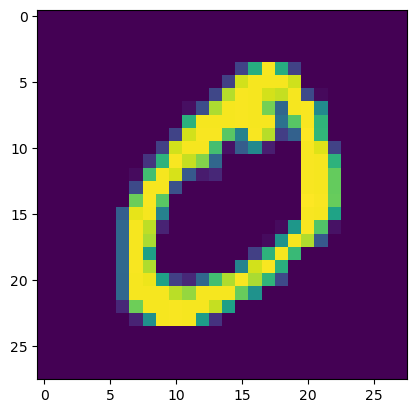

In [3]:
import numpy as np
import matplotlib.pyplot as plt

index=1
np.set_printoptions(linewidth=320)
print(f'label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
plt.imshow(training_images[index])

#### Normalizacipn de los datos

In [4]:
training_images = training_images / 255.0
test_images = test_images / 255.0

#### Construccion del modelo

In [16]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                keras.layers.Dense(128, activation='relu'),
                                keras.layers.Dense(10, activation='softmax')])

#### Compilacion del Modelo

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento del modelo

In [19]:
history = model.fit(training_images, training_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8746 - loss: 0.4369
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9640 - loss: 0.1209
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0786
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0546
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0431
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9903 - loss: 0.0327
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0258
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9937 - loss: 0.0208
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9954 - loss: 0.0170
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9954 - loss: 0.0145


#### Graficar Hitorial de entrenamiento

<Axes: >

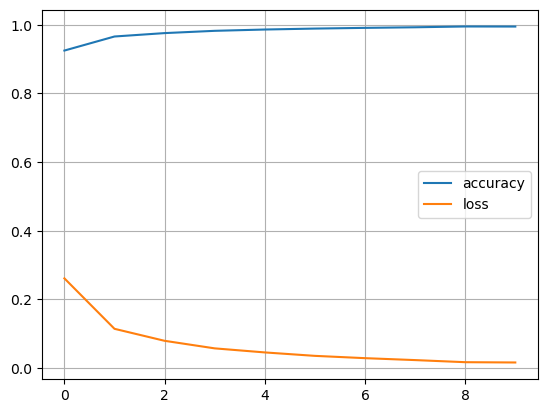

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot(grid = True)

#### Evaluacion del modelo

In [21]:
loss, accuracy = model.evaluate(training_images, training_labels)
print('Pérdida en el conjunto de entrenmiento:', loss)
print('Precisión en el conjunto de entrenamiento:', accuracy)

loss,accuracy = model.evaluate(test_images, test_labels)
print('Perdida en el conjunto de prueba;', loss)
print('Precision en el conjunto de prueba', accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9970 - loss: 0.0103
Pérdida en el conjunto de entrenmiento: 0.010898065753281116
Precisión en el conjunto de entrenamiento: 0.9968833327293396
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9765 - loss: 0.0932
Perdida en el conjunto de prueba; 0.08102955669164658
Precision en el conjunto de prueba 0.979200005531311


#### Predicción de una muestra

In [22]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Perdida en el conjunto de prueba:', loss)
print('Precision en el conjunto de prueba:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9765 - loss: 0.0932
Perdida en el conjunto de prueba: 0.08102955669164658
Precision en el conjunto de prueba: 0.979200005531311


1. ¿Qué conjunto de datos se utiliza en este código y qué problema de aprendizaje automático se aborda?

2. ¿Por qué es importante normalizar los valores de píxeles de las imágenes antes de entrenar el modelo?

3. ¿Qué arquitectura de red neuronal se utiliza en este código y cuántas capas
tiene?

4. ¿Cuál es la función de activación utilizada en la capa oculta y en la capa de salida de la red neuronal, y por qué se eligen esas funciones?

5. ¿Qué función de pérdida se utiliza para compilar el modelo y qué métricas se utilizan para evaluar su rendimiento?

6. ¿Cuántas épocas se utilizan para entrenar el modelo y por qué se elige ese número?

7. ¿Qué signica la función model.summary() y qué información proporciona?

#### Ejercicios de exploración

1. Ejecuta la predicción de una muestra y observa que el resultado es una lista de números.

2. ¿Por qué crees que es así y qué representan esos números?

3. Experimenta con diferentes valores para el número de neuronas en la capa oculta de la red neuronal y observa cómo afecta el rendimiento del modelo.

4. Cambia la función de activación de la capa oculta a "sigmoid" o "tanh" y observa cómo afecta el rendimiento del modelo.

5. ¿Qué sucedería si eliminas la capa Flatten()?

6. Reflexiona sobre cómo afectaría esto al procesamiento de las imágenes y por qué.

7. Prueba diferentes optimizadores, como "sgd" o "rmsprop", y observa cómo afectan el rendimiento del modelo.

8. Aumenta el número de épocas de entrenamiento y observa cómo afecta el rendimiento del modelo.


9. Modifica la arquitectura de la red neuronal agregando capas adicionales o cambiando el número deneuronas en cada capa, y observa cómo afecta el rendimiento del modelo.


10. Elimina la normalización de los valores de píxeles y observa cómo afecta el rendimiento del modelo.

11. Considera las capas finales (de salida). ¿Por qué hay 10 de ellas? ¿Qué pasaría si tuvieras una cantidad diferente a 10?

12. Intenta entrenar la red con un número diferente de capas finales y reflexiona sobre cómo afectaría esto a la capacidad de clasicación del modelo.

13. Prueba el modelo con imágenes de prueba y observa cómo se comporta en datos no vistos.

Estas preguntas y ejercicios te ayudarán a profundizar tu comprensión del código y a explorardiferentes aspectos del entrenamiento de redes neuronales en el reconocimiento de dígitos escritos a mano usando el conjunto de datos MNIST.